# EXAMEN : LABORATORIO
## Miguel Fernández
Este análisis tiene como objetivo explorar los factores asociados a la **deserción escolar en Paraguay**, usando datos de la Encuesta Permanente de Hogares de los años 2023 y 2024.  

A lo largo del análisis se estudiarán variables relacionadas con características demográficas, condiciones del hogar y nivel educativo.

In [1]:
# Configuración de las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 

# Configuración general
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

#Carga del dataset

df = pd.read_csv("Pobla23_24.csv", sep=";", encoding="utf-8", low_memory=False)
#df = pd.read_csv("C:/Users/FOAM/Desktop/AnalisisDeDatos_CIT/ProyectoFinal/Pobla23_24.csv", sep=";", encoding="utf-8", low_memory=False)
print(df.columns.tolist())
df.head()


['UPM', 'NVIVI', 'NHOGA', 'AÑO', 'DPTO', 'AREA', 'L02', 'P02', 'P03', 'P04', 'P06', 'P09', 'A02', 'B01REC', 'B02REC', 'B04', 'B05', 'B16T', 'ED02', 'ED03', 'ED0504', 'ED06C', 'ED08', 'ED09', 'ED10', 'ED11F1', 'ED11GH1', 'CATE_PEA', 'OCUP_PEA', 'RAMA_PEA', 'TIPOHOGA', 'FEX.2022', 'NJEF', 'añoest', 'pobrezai', 'pobnopoi']


,UPM,NVIVI,NHOGA,AÑO,DPTO,AREA,L02,P02,P03,P04,...,ED11GH1,CATE_PEA,OCUP_PEA,RAMA_PEA,TIPOHOGA,FEX.2022,NJEF,añoest,pobrezai,pobnopoi
0,14,3,1,2023,0,1,1,42,1,1,...,,2,9,5,4,"87,249706576",604,10,3,0
1,14,3,1,2023,0,1,2,32,9,1,...,,2,8,5,4,"87,249706576",604,12,3,0
2,14,3,1,2023,0,1,3,27,9,1,...,,2,4,7,4,"87,249706576",604,12,3,0
3,14,3,1,2023,0,1,4,29,9,1,...,,2,9,5,4,"87,249706576",604,10,3,0
4,14,3,1,2023,0,1,5,19,9,1,...,6,,,,4,"87,249706576",604,10,3,0


Seleccionamos las siguientes variables por su relevancia para el estudio de la deserción escolar:

- **P02**: Edad
- **P06**: Sexo
- **P03**: Relación con el jefe de hogar
- **ED02**: Sabe leer y escribir
- **ED03**: Asiste o asistió a institución educativa
- **ED08**: Asiste actualmente
- **ED09**: Sector de la institución
- **ED10**: Razones de no asistencia
- **ED0504**: Nivel y grado aprobado
- **ED06C**: Título o diploma obtenido
- **TIPOHOGA**: Tipo de hogar
- **NJEF**: Nivel de instrucción del jefe del hogar
- **pobrezai**: Estatus de pobreza
- **Ano**: Año de la encuesta

In [3]:
# Limpieza de columnas y normalización
df.columns = df.columns.str.strip()  # Remover espacios
df["FEX.2022"] = df["FEX.2022"].str.replace(",", ".").astype(float)  # Convertimos la variable fex.2022 a float para su uso más adelante

#Planteamos un analisis básico del dataset

# Dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

#Informacion general del dataset
df.info()

#Estadisticas base
df.describe(include='all')

#Verificacion de valores nulos
df.isnull().sum()


AttributeError: Can only use .str accessor with string values!

### Creció o no la cantidad de niños y jovenes en edad escolar (5 a 18 años) que desertaron y no asisten a la escuela?
#### Estariamos analizando el dato que se encarga de medir esta pregunta que seria el ED03. Lo interpretamos de la siguiente forma:
- ED03 = 1 asiste actualmente
- ED03 = 2 no asiste actualmente (posible deserción)
- ED03 = 3 Nunca asistió

    AÑO  CantidadDesertores
0  2023                 143
1  2024                 152


C:\Users\FOAM\AppData\Local\Temp\ipykernel_2568\2371014979.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desertores_por_ano, x="AÑO", y="CantidadDesertores", palette="viridis")


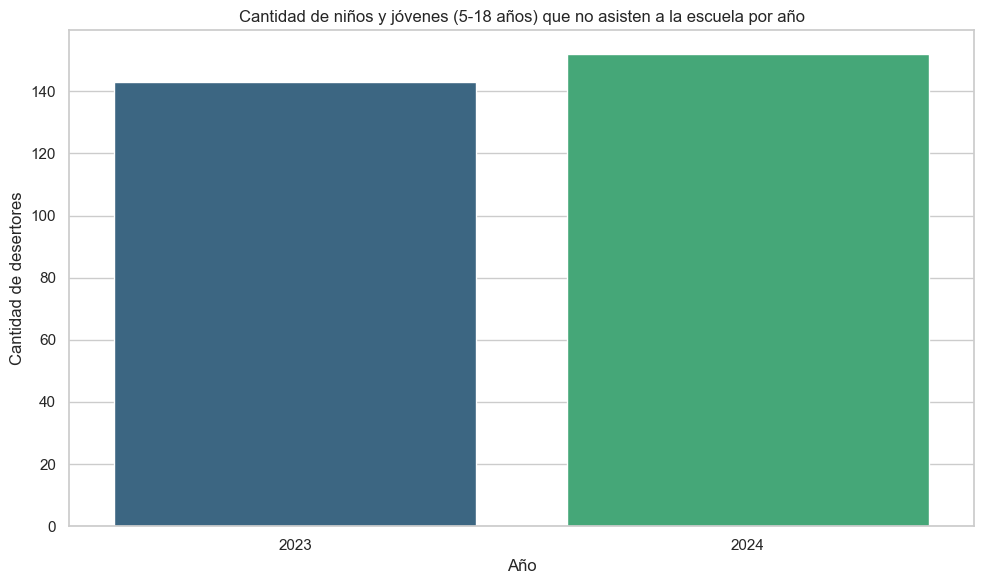

In [4]:
# Asegurarnos de que las columnas relevantes están como enteros (por si vienen como texto)

df["P02"] = pd.to_numeric(df["P02"], errors="coerce")
df["ED03"] = pd.to_numeric(df["ED03"], errors="coerce")
df["AÑO"] = pd.to_numeric(df["AÑO"], errors="coerce")

# Filtrar por edad de 5 a 18 años
df_esc_edad = df[(df["P02"] >= 5) & (df["P02"] <= 18)]

# Filtrar los que NO asisten actualmente
df_desertores = df_esc_edad[df_esc_edad["ED03"].isin([6,9])]

# Agrupar por año y contar desertores
desertores_por_ano = df_desertores.groupby("AÑO").size().reset_index(name="CantidadDesertores")
print(desertores_por_ano)

# Visualizar con gráfico de barras
sns.barplot(data=desertores_por_ano, x="AÑO", y="CantidadDesertores", palette="viridis")
plt.title("Cantidad de niños y jóvenes (5-18 años) que no asisten a la escuela por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de desertores")
plt.tight_layout()
plt.show()


### Conclusión del punto 1
Se puede observar que en el año 2023 hubieron 143 casos registrados de deserción escolar, mientras que en el año 2024 hubieron 152 casos registrados. Un aumento del 6.29% nos supune un escenario en donde las políticas públicas educativas puedan ser cuestionables, también podría deberse a migraciones internas, pero lo más probable viene siendo la crisis económica que está atravesando el país en dónde hoy en día, si perteneces a una familia de escasos recursos puede que sea más conveniente abandonar los estudios por un trabajo remunerado que asegure la subsistencia de la familia. 
__________________________________________________________________________________________________

### Cantidad de personas que desertaron y no saben leer ni escribir.


In [5]:
# Asegurarse de que ED02 y ED08 estén como numéricos
df["ED02"] = pd.to_numeric(df["ED02"], errors="coerce")
df["ED08"] = pd.to_numeric(df["ED08"], errors="coerce")

#Como un dato extra filtramos solo los analfabetos
analfabetos = df[(df["ED02"] == 2) & (df["P02"] > 6)]

# Filtrar personas que no saben leer y no asisten actualmente
analfabetos_desertores = df[(df["ED02"] == 2) & (df["ED08"] == 2)]

# Contar cuántos son
total_analfabetos_desertores = analfabetos_desertores.shape[0]
total_analfabetos = analfabetos.shape[0]

print(f"Total de personas analfabetas del país: {total_analfabetos}")
print(f"Total de personas que no saben leer ni escribir y no asisten actualmente: {total_analfabetos_desertores}")


Total de personas analfabetas del país: 5477
Total de personas que no saben leer ni escribir y no asisten actualmente: 2406


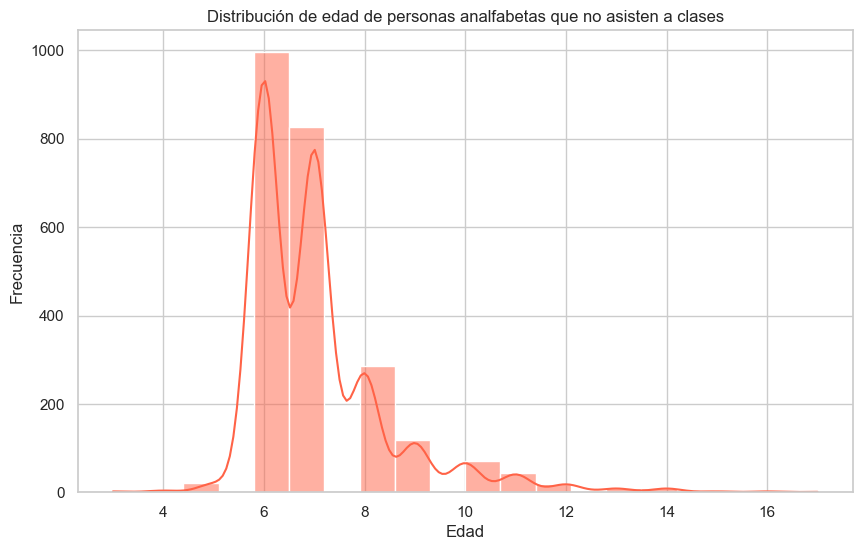

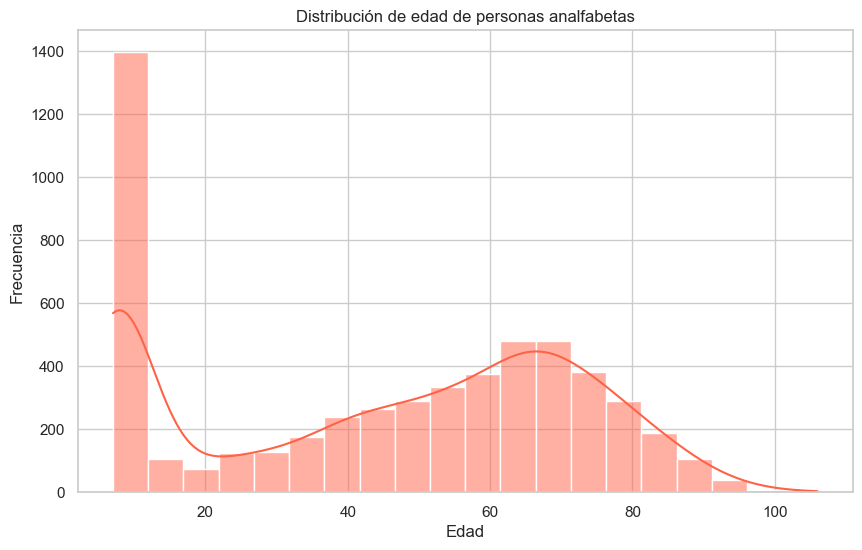

In [6]:
#Figura  que representa el total de personas que no saben leer ni escribir y que desertaron
plt.figure(figsize=(10, 6))
sns.histplot(
    data=analfabetos_desertores,
    x="P02",
    bins=20,
    kde=True,
    color="tomato"
)
plt.title("Distribución de edad de personas analfabetas que no asisten a clases")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

#Figura que represente el analfabetismo en general del Paraguay
plt.figure(figsize=(10, 6))
sns.histplot(
    data=analfabetos,
    x="P02",
    bins=20,
    kde=True,
    color="tomato"
)
plt.title("Distribución de edad de personas analfabetas")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

### Conclusion del punto 2
Podemos observar que el total de encuestados que son analfabetas y que no asisten actualmente son de 24006 personas, cifra bastante alarmante, ya que cómo nos muestra en el gráfico llega al pico más alto entre la edad de 5 a 12 años. Cabe resaltar también que si solo miramos los datos de analfabetismo registrado en el país llega hasta las 5477 personas.
Lo que nos lleva de nuevo a plantear dudas sobre la eficacia de las políticas educativas ejercidas hasta la fecha en el Paraguay.
____________________________________________________________________________________________________

### Relaciones directas de la variable ED08: Asiste actualmente
En este apartado podemos resaltar las siguientes variables:
- ED08: ASISTE ACTUALMENTE. Variable principal.
- ED03: ASISTE O ASISTIÓ A INSTITUCION EDUCATIVA. Variable relacional.
- ED02: ¿SABE LEER Y ESCRIBIR?. Variable relacional.
- ED06C: TITULO O DIPLOMA OBTENIDO. Variable relacional.
- P02: EDAD. Variable general.
- FEX.2022: FACTOR DE DISEÑO MUESTRAL.
- añoest: AÑO DE LA ENCUESTA. Variable general.
- pobrezai: INDICADOR O ESTADO DE POBREZA. Variable relacional.

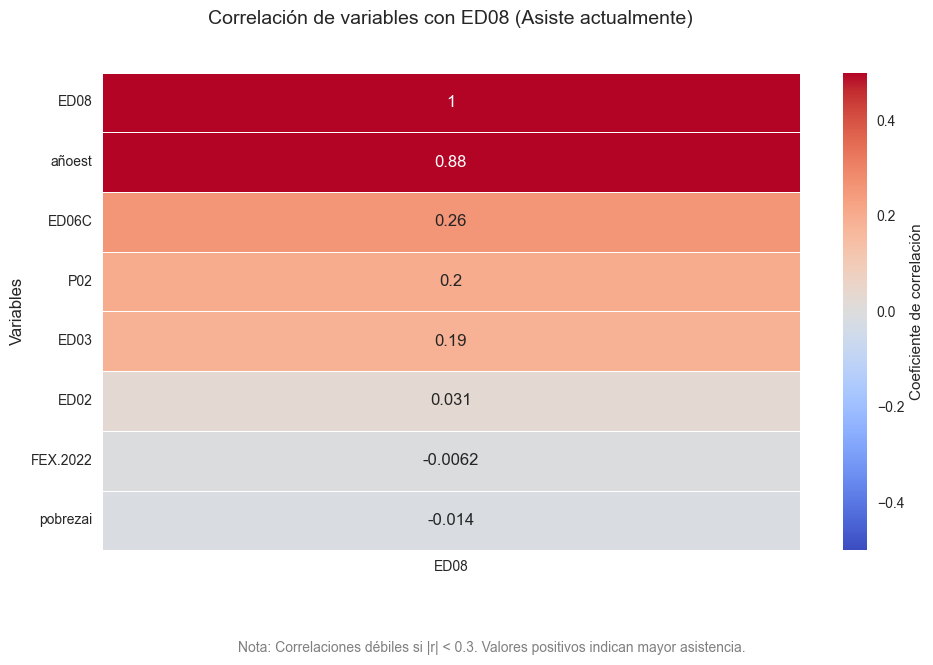

In [7]:
# Procedemos a la configuracion del estilo
plt.style.use('seaborn-v0_8')  
sns.set_palette("viridis")  # Paleta de colores accesible

# 1. Preprocesamiento seguro evitando así columnas que no existen o no son de nuestro interes
cols_convertir = ["ED08", "ED03", "ED02", "ED06C", "P02", "FEX.2022", "añoest", "pobrezai"]
cols_disponibles = [col for col in cols_convertir if col in df.columns]
df[cols_disponibles] = df[cols_disponibles].apply(pd.to_numeric, errors="coerce")

# 2. Calcular correlación solo con datos completos
numeric_df = df[cols_disponibles].dropna()
corr_matrix = numeric_df.corr()

# 3. Mapa de calor
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    corr_matrix[["ED08"]].sort_values(by="ED08", ascending=False),
    annot=True,
    cmap="coolwarm",
    center=0,  # Punto neutro en blanco
    vmin=-0.5,  # Rango fijo para comparaciones
    vmax=0.5,
    annot_kws={"size": 12},  # Tamaño de los números
    linewidths=0.5,  # Líneas divisorias
    cbar_kws={"label": "Coeficiente de correlación"}  # Etiqueta de la barra de calor
)

# 4. Configuracion o personalizacion adicional que nunca está de más
plt.title("Correlación de variables con ED08 (Asiste actualmente)\n", fontsize=14, pad=20)
plt.xlabel("")  # Eliminar etiqueta redundante
plt.ylabel("Variables", fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)  # Etiquetas horizontales

# 5. Añadimos notas explicativas para un mejor entendimiento o un trabajo más pulcro
plt.figtext(
    0.5, -0.1,
    "Nota: Correlaciones débiles si |r| < 0.3. Valores positivos indican mayor asistencia.",
    ha="center",
    fontsize=10,
    color="gray"
)

plt.tight_layout()  # Ajustar espacios
plt.show()

### Análisis del gráfico y sus correlaciones
#### Correlación Positiva
- **añoest (Años de educación):** 0.88
Fuerte correlación (la más fuerte del análisis). A mayor nivel educativo alcanzado, menor probabilidad de estar actualmente asistiendo (posiblemente porque estudiantes avanzados ya completaron su educación)
- **ED06C (Nivel educativo actual):** 0.26
Correlación negativa moderada. Sugiere que estudiantes en niveles educativos más altos tienen menor asistencia actual.
- **P02 (Edad):** 0.2
Correlación débil. Los estudiantes de mayor edad tienden a asistir menos.
#### Correlación Negativa
- **ED03 (Tipo de institución):** 0.19
Muy débil, pero sugiere que el tipo de institución podría tener mínima influencia

- **ED02 (Sector educativo):** 0.031
Prácticamente nula (no relación discernible).

- **pobrezai (Índice de pobreza):** -0.014
Correlación insignificante (contrario a lo que suele esperarse).

- **FEX 2022 (Factor de expansión):** -0.0062
Sin relación con la asistencia (como era de esperar en un factor muestral)

### Conclusión punto 3
Tenemos un resultado contraintuitivo, la pobreza (pobrezai) muestra una correlación casi neutral (0) lo que contradice la literatura típica sobre la deserción. Entonces en este caso podríamos asumir que la deserción escolar está más ligada a factores académicos que socioeconómicos.
____________________________________________________________________________________________________

### Gráfico de razones de inasistencia ED10

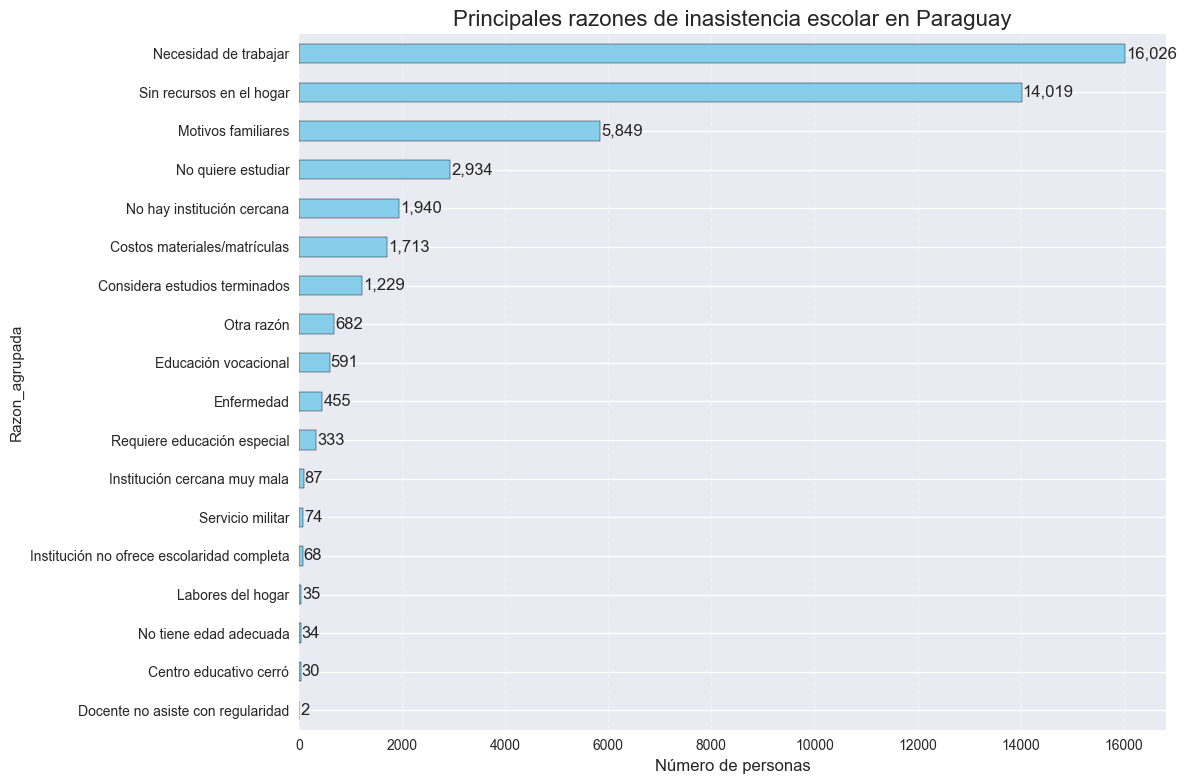

In [8]:
# "Limpiamos" la columna ED10
df["ED10"] = pd.to_numeric(df["ED10"], errors="coerce")  # Convertir a numérico
df["ED10"] = df["ED10"].replace(99, pd.NA).dropna()      # Eliminar "No responde" (99) y NaN

# Filtramos los que no asisten
no_asiste = df[df["ED08"] == 19].copy()

# Mapeamos las razones de no asistencia conforme a los datos proporcionados por el Anexo
razones_dict = {
    1: "Sin recursos en el hogar",
    2: "Necesidad de trabajar",
    3: "Costos materiales/matrículas",
    4: "No tiene edad adecuada",
    5: "Considera estudios terminados",
    6: "No hay institución cercana",
    7: "Institución cercana muy mala",
    8: "Centro educativo cerró",
    9: "Docente no asiste con regularidad",
    10: "Institución no ofrece escolaridad completa",
    11: "Requiere educación especial",
    12: "Enfermedad",
    13: "Labores del hogar",
    14: "Motivos familiares",
    15: "No quiere estudiar",
    16: "Educación vocacional",
    17: "Servicio militar",
    18: "Otra razón"
}
no_asiste["Razon_agrupada"] = no_asiste["ED10"].map(razones_dict)

# Contamos y ordenamos las razones previamente ya citadas
razones = no_asiste["Razon_agrupada"].value_counts().sort_values()

# Codigo del grafico
if not razones.empty:
    plt.figure(figsize=(12, 8))
    razones.plot(kind="barh", color="skyblue", edgecolor="black")
    plt.title("Principales razones de inasistencia escolar en Paraguay", fontsize=16)
    plt.xlabel("Número de personas", fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.3)
    
    # Etiquetas de valor
    for i, v in enumerate(razones):
        plt.text(v + 20, i, f"{v:,}", va="center")
    
    plt.tight_layout()
    plt.show()
else:
    print("Error: Revisa los códigos de ED08 y ED10.")

### Conclusión del punto 4.
La realidad golpea fuerte, teniendo así 16026 registros de abandono escolar por trabajo remunerado o de sustento familiar y otros 14019 por la precariedad del hogar. La pobreza y la presión económica del país obligan a adolescentes y niños a trabajar y abandonar la escuela para apoyarse a sí mismos o inclusive a mantener a sus familias.
La problemática de motivos familiares y no quieren estudiar puede estar fuertemente ligada a casos de migración, familia destructurada o falta de motivación de parte de las instituciones educativas.
Los demás problemas pueden reflejar que el país aún no puede brindar una mínima educación a todos los necesitados debido a lo inaccesible o la inimportancia que dan a ciertas zonas rurales del país. Lastimosamente estos registros reflejan la poca confianza que algunas familias poseen sobre la calidad educativa del país y que es mejor centrarse en otras cosas (trabajo remunerado).
____________________________________________________________________________________________________

### **Conclusión y Recomendación**
- La asistencia escolar varía según la condición de pobreza: los niños en situación de pobreza tienen una menor tasa de asistencia.
- Las razones de no asistencia (`ED10`) deben explorarse en mayor profundidad para identificar patrones recurrentes.
- Factores como edad, nivel educativo alcanzado por los padres y tipo de hogar también podrían estar relacionados con la deserción y deberían incluirse en modelos predictivos futuros.
- Diseñar políticas focalizadas en hogares con bajos ingresos y baja escolaridad parental.
- Ampliar programas de retención escolar especialmente en áreas rurales y comunidades vulnerables.
____________________________________________________________________________________________________

### Anexo
Como un Anexo podríamos intentar predecir la deserción escolar mediante un modelo predictivo usando como base un modelo **Random Forest (Bosque Aleatorio)**


Este bloque de código define un transformador personalizado para codificación de variables categóricas que puede integrarse en pipelines de scikit-learn.
Se podría usar también OneHotEncoder en vez del scikit-learn.

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd #Se puede obviar ya que ya habíamos importado esta librería anteriormente

class DummyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, drop_first=True):
        self.drop_first = drop_first
        self.columns_ = None
        
    def fit(self, X, y=None):
        # Guardamos los nombres de columnas para consistencia en transform
        self.columns_ = X.columns if hasattr(X, 'columns') else None
        return self
    
    def transform(self, X):
        if hasattr(X, 'iloc'):  # Si es DataFrame o Serie
            return pd.get_dummies(X, drop_first=self.drop_first)
        else:  # Para arrays numpy
            X_df = pd.DataFrame(X, columns=self.columns_)
            return pd.get_dummies(X_df, drop_first=self.drop_first).values

Este bloque ya se encargaría del modelo de predicción de la deserción escolar en nuestro país. Si bien es un modelo incompleto (ya que faltaría visualizar la matriz de confusión, evaluar el desempeño de distintos umbrales con la curva ROC/AUC, análisis de errores e identificar qué variables impulsan más las predicciones y un proceso de validación con datos temporales como prueba), puede sentar una base para poder desarrollar un modelo más completo y eficiente dependiendo de la necesidad, precisión o algún otro carácter a evaluar en cuánto a la deserción escolar.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Carga de datos y preparacion del target

df["deserta"] = df["ED08"].apply(lambda x: 1 if x == 19 else 0)

# Definimos las variables
features = ["P02", "P06", "ED02", "ED03", "ED06C", "TIPOHOGA", "pobrezai", "añoest", "NJEF"]
target = "deserta"

# Dividimos los datos
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir columnas categóricas y numéricas
cat_cols = ["P06", "ED02", "ED03", "pobrezai"]
num_cols = [col for col in features if col not in cat_cols]

# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', DummyEncoder(drop_first=True))
        ]), cat_cols)
    ])

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        class_weight='balanced',
        random_state=42,
        n_jobs=-1))
])

# Entrenamiento
pipeline.fit(X_train, y_train)

# Evaluación
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     20893
           1       0.91      0.95      0.93     13832

    accuracy                           0.94     34725
   macro avg       0.94      0.94      0.94     34725
weighted avg       0.94      0.94      0.94     34725



### **Interpretación de los resultados**
- **Exactitud** (Accuracy - 0.94)
El modelo acierta el 94% de las predicciones en general
En problemas con clases desbalanceadas, esta métrica puede ser engañosa

- **Precisión para clase 1** (Deserción - 0.91)
Cuando predice deserción, acierta el 91% de las veces.
Interpretación: De 100 estudiantes predichos como desertores, ~91 realmente desertarán

- **Recall/Sensibilidad** para clase 1 (0.95)
Detecta el 95% de los casos reales de deserción.
Interpretación: De 100 estudiantes que realmente desertarán, identifica correctamente a 95

- **F1-Score** para clase 1 (0.93)
Balance entre precisión y recall (media armónica).
Excelente puntaje, cercano al máximo (1.0)

### **Análisis Crítico**
**Aspectos Positivos**
- Alto recall para deserción (0.95): No es solo importante, sino crucial identificar la mayor cantidad posible de estudiantes en riesgo de abandonar la institución.
- Buena precisión (0.91): No generaría demasiadas falsas alarmas.
- Balance general: Ambas clases tienen métricas similares y no poseen un sesgo evidente

**Posibles problemas no visibles**
- Posible sobreajuste: Métricas muy altas podrían indicar fugas de datos (data leakage) o variables muy predictivas (Pasa cuando se incluyen variables que son consecuencias de la deserción y no causa)
- Utilidad práctica: Se podrían planteal las siguientes preguntas.
    - ¿Es sostenible intervenir con el 5% de falsos positivos? (Estudiantes predichos como desertores pero no lo serán).
    - ¿Es aceptable perder el 5% de verdaderos desertores (falsos negativos)?.
    